# Hypothesis Testing in R

## Non Paramteric Tests

These tests do not assume a specific population distribution (like normality).

* They are used when:

* The data is not normally distributed.

* The sample size is small.

* The data is ordinal (ranks) or categorical.

* They are less powerful than parametric tests but more robust.

### Chi-Square Test

A non-parametric test that compares observed frequencies with expected frequencies in categorical data.

1. Goodness of Fit Test

Checks whether the observed distribution of one categorical variable matches an expected (theoretical) distribution.

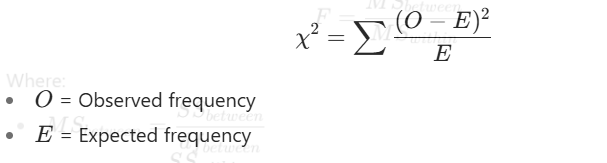

*Example:* Checking if dice is fair (each face should appear equally often).

2. Test of Independence

* Checks if two categorical variables are independent.

* Uses a contingency table (cross-tabulation of frequencies).

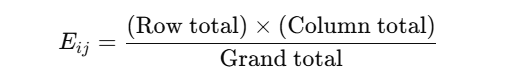

*Example:* Checking if gender and preference for a product are independent.

### Interpretation

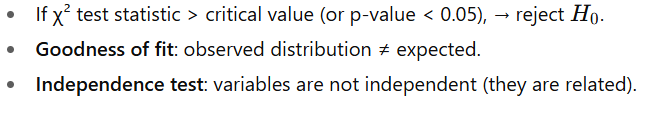

*Example:* Check if smoking habit (Smoke) is independent of sex (Sex).

In [1]:
# Load the MASS package
library(MASS)

# Load survey dataset
data("survey")

# Take a quick look
head(survey)

# Create a contingency table
tbl <- table(survey$Smoke, survey$Sex)
tbl

# Perform chi-square test
chisq.test(tbl)


,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


       
        Female Male
  Heavy      5    6
  Never     99   89
  Occas      9   10
  Regul      5   12


	Pearson's Chi-squared test

data:  tbl
X-squared = 3.5536, df = 3, p-value = 0.3139


The result shows that p > significance level, Ho is not rejected. This means that the smoking habits of students are independent of their exercise levels.

The manager of a restaurant wants to find the relation between customer satisfaction and the salaries of the people waiting tables. Here is what the manager does: 
* Takes a random sample of 100 customers asking if the service was excellent, good, or poor. 
* Categorizes the salaries of the people waiting as low, medium, and high

| **Satisfaction \ Salary** | Low | Medium | High | Total |
| ------------------------- | --- | ------ | ---- | ----- |
| Excellent                 | 10  | 20     | 25   | 55    |
| Good                      | 15  | 10     | 5    | 30    |
| Poor                      | 5   | 5      | 5    | 15    |
| **Total**                 | 30  | 35     | 35   | 100   |


In [2]:
# Create contingency table
satisfaction_salary <- matrix(c(10,20,25,
                                15,10,5,
                                5,5,5),
                              nrow = 3, byrow = TRUE)

# Assign row and column names
rownames(satisfaction_salary) <- c("Excellent", "Good", "Poor")
colnames(satisfaction_salary) <- c("Low", "Medium", "High")

# Print table
satisfaction_salary

# Perform Chi-square test
chisq.test(satisfaction_salary)


,Low,Medium,High
Excellent,10,20,25
Good,15,10,5
Poor,5,5,5


Warning message in chisq.test(satisfaction_salary):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  satisfaction_salary
X-squared = 11.291, df = 4, p-value = 0.02348


Since p = 0.023 < 0.05, we reject null hypothesis.
This means there is a significant relationship between customer satisfaction and waiter salaries.

## Summary

* Do not assume normal distribution.

* Work with ordinal or categorical data.

* Useful when sample size is small or when parametric test assumptions are violated.

* Less powerful than parametric tests (need stronger evidence to reject H0)

| Type of Test                      | Purpose                                                   | Null Hypothesis ($H_0$)                                                 | Example in R                                       |
| --------------------------------- | --------------------------------------------------------- | ----------------------------------------------------------------------- | -------------------------------------------------- |
| **Goodness of Fit**               | Tests if observed frequencies match expected distribution | Data fits a theoretical distribution (e.g., uniform, normal categories) | `chisq.test(c(Observed), p = ExpectedProportions)` |
| **Independence of Two Variables** | Tests if two categorical variables are related            | Variables are independent                                               | `chisq.test(matrix_data)`                          |
